In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Dev_df = pd.read_csv("C:/Users/loris/Desktop/Project ER/Develop Ind.csv")
HDI_df = pd.read_csv("C:/Users/loris/Desktop/Project ER/human-development-index.csv")


In [3]:
HDI_df
HDI_df.shape

(5923, 4)

In [4]:
#i'm watching the stucture of the dataset
HDI_df.head()
print(HDI_df.tail())
HDI_df[5890:5923]
HDI_df.info()

        Entity Code  Year  Human Development Index
5918  Zimbabwe  ZWE  2017                    0.594
5919  Zimbabwe  ZWE  2018                    0.602
5920  Zimbabwe  ZWE  2019                    0.601
5921  Zimbabwe  ZWE  2020                    0.600
5922  Zimbabwe  ZWE  2021                    0.593
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5923 non-null   object 
 1   Code                     5603 non-null   object 
 2   Year                     5923 non-null   int64  
 3   Human Development Index  5923 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 185.2+ KB


In [5]:
#i'm watching the stucture of the dataset
Dev_df.head()
Dev_df.info()
print(Dev_df.shape)
Dev_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 57 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Country Name                                                                                           6652 non-null   object 
 1   Country Code                                                                                           6650 non-null   object 
 2   Time                                                                                                   6650 non-null   float64
 3   Time Code                                                                                              6650 non-null   object 
 4   Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                    

,Country Name,Country Code,Time,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",...,"Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]
6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6653,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6654,Last Updated: 12/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Glob_df = Dev_df.copy()
Glob_df.rename(columns={"Country Code": "Code"}, inplace=True)
Glob_df.rename(columns={"Time": "Year"}, inplace=True)

In [7]:
#I tried change type of Year column before the merge, but i can't for Nan
Glob_df.isnull().sum()
Glob_df[6645:6655]

,Country Name,Code,Year,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",...,"Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]
6645,World,WLD,2018.0,YR2018,..,27747000000,..,0.244465922682497,..,24.0005235602094,...,50.3153108944173,2.2352388374351,1525.14905010327,134627209.182,64.1199308252945,1.47400076017666,1.43138591397975,3.75679319335029,4.12928145527479,2.48444490542153
6646,World,WLD,2019.0,YR2019,..,27443000000,..,0.184136146546094,..,19.7759162303665,...,50.3081407578818,2.31155921067228,..,134725642.514,64.715262402012,1.38529872922998,1.35101476012157,3.77415436992569,4.14938317690655,2.13539857189219
6647,World,WLD,2020.0,YR2020,..,23320000000,..,0.144820387786694,..,..,...,50.2948196395522,2.49168211685821,..,134732038.315,65.2641487099283,1.35298230965981,1.36348244342479,4.29758070560122,4.54327875225854,1.46453859990474
6648,World,WLD,2021.0,YR2021,..,26540000000,..,0.262040813565189,..,..,...,50.2776758409845,2.71192656212256,..,140486936.909,63.9688548634094,1.40195907882602,1.41048498733681,4.86302391635145,5.30214304764037,3.02947686313513
6649,World,WLD,2022.0,YR2022,..,31739000000,..,..,..,..,...,50.2647173965581,..,..,..,..,1.32866140371674,1.28208099632635,4.25557953405654,4.74993052271817,..
6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6653,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6654,Last Updated: 12/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Glob_df[5424:6656]
#watching Nan Data i noticed that there are also some aggregate of geographics areas
#so i'm deleting all the rows under the last country in the dataset
Glob_df.drop(Glob_df.index[5425:6656], inplace=True)

In [9]:
print(Glob_df.shape)
print(HDI_df.shape)

(5425, 57)
(5923, 4)


In [10]:
#now i change the type of Year in Glob_df to have the same type of HDI_df
Glob_df["Year"] = Glob_df["Year"].astype(int)

print(f"{Glob_df.columns}\n{HDI_df.columns}")

Index(['Country Name', 'Code', 'Year', 'Time Code',
       'Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]',
       'Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]',
       'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
       'Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
       'Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]',
       'Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
       'Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.

In [11]:
Glob_df = Glob_df.set_index(["Code", "Year"])
HDI_df = HDI_df.set_index(["Code", "Year"])

In [12]:
print(HDI_df)
print(Glob_df)

                Entity  Human Development Index
Code Year                                      
AFG  1990  Afghanistan                    0.273
     1991  Afghanistan                    0.279
     1992  Afghanistan                    0.287
     1993  Afghanistan                    0.297
     1994  Afghanistan                    0.292
...                ...                      ...
ZWE  2017     Zimbabwe                    0.594
     2018     Zimbabwe                    0.602
     2019     Zimbabwe                    0.601
     2020     Zimbabwe                    0.600
     2021     Zimbabwe                    0.593

[5923 rows x 2 columns]
          Country Name Time Code  \
Code Year                          
AFG  1998  Afghanistan    YR1998   
     1999  Afghanistan    YR1999   
     2000  Afghanistan    YR2000   
     2001  Afghanistan    YR2001   
     2002  Afghanistan    YR2002   
...                ...       ...   
ZWE  2018     Zimbabwe    YR2018   
     2019     Zimbabwe    Y

In [13]:
#I controll the null values before the merge
print(f"{Glob_df.isnull().sum()}\n{HDI_df.isnull().sum()}")

Country Name                                                                                             0
Time Code                                                                                                0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                             0
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                             0
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                            0
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                0
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                          0
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                0
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                       0
Current health expenditure (% of GDP)

In [14]:
print(HDI_df[5855:5940])

             Entity  Human Development Index
Code Year                                   
YEM  2018     Yemen                    0.459
     2019     Yemen                    0.461
     2020     Yemen                    0.460
     2021     Yemen                    0.455
ZMB  1990    Zambia                    0.412
...             ...                      ...
ZWE  2017  Zimbabwe                    0.594
     2018  Zimbabwe                    0.602
     2019  Zimbabwe                    0.601
     2020  Zimbabwe                    0.600
     2021  Zimbabwe                    0.593

[68 rows x 2 columns]


In [15]:
#I do the merge, how="left" to use only keys from left frame and using index of both datasets for the merge
Glob_df = Glob_df.merge(HDI_df["Human Development Index"], left_index=True, right_index=True, how="left")

#I controll the Nan created with the merge
Glob_df["Human Development Index"].isnull().value_counts()

Glob_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5425 entries, ('ABW', 1998) to ('ZWE', 2022)
Data columns (total 56 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Country Name                                                                                           5425 non-null   object 
 1   Time Code                                                                                              5425 non-null   object 
 2   Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                           5425 non-null   object 
 3   Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                           5425 non-null   object 
 4   Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]              

In [16]:
HDI_nan_countries = Glob_df.groupby("Code")["Human Development Index"].agg(lambda x : x.isnull().sum())
HDI_nan_countries

Code
ABW    25
AFG     1
AGO     2
ALB     1
AND     3
       ..
XKX    25
YEM     1
ZAF     1
ZMB     1
ZWE     1
Name: Human Development Index, Length: 217, dtype: int64

In [17]:
#i'm watching how many countries have no data for the HDI
HDI_nan_countries[HDI_nan_countries == 25].index


Index(['ABW', 'ASM', 'BMU', 'CHI', 'CUW', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM',
       'IMN', 'MAC', 'MAF', 'MCO', 'MNP', 'NCL', 'NRU', 'PRI', 'PRK', 'PYF',
       'SOM', 'SXM', 'TCA', 'VGB', 'VIR', 'XKX'],
      dtype='object', name='Code')

In [18]:
#This country code there were not in HDI_df. I controlled with ex. HDI_df.loc["GUM"] HDI_df.loc["SXM"]

In [19]:
#The others country with Nan Values is for dismatch beetween years in the two merged dataset
#(every country have at least one because the year 2022 there was not in the HDI_df ), 
#so i decided to delete the year 2022 and mantain only country with <5
HDI_df.loc["AGO"]
HDI_df.loc["GNB"]
HDI_df.loc["AND"]

,Entity,Human Development Index
Year,,
2000,Andorra,0.818
2001,Andorra,0.825
2002,Andorra,0.832
2003,Andorra,0.841
2004,Andorra,0.833
2005,Andorra,0.833
2006,Andorra,0.848
2007,Andorra,0.847
2008,Andorra,0.850


In [20]:
#i decided to delete countries with more than 4 Nan so i control which they are
HDI_too_nan = HDI_nan_countries[(HDI_nan_countries > 5)]

#i control the countris with too many nan values in the HDI column
HDI_too_nan.index

Index(['ABW', 'ASM', 'ATG', 'BMU', 'BTN', 'CHI', 'CUW', 'CYM', 'FRO', 'GIB',
       'GNB', 'GRL', 'GUM', 'IMN', 'KNA', 'LBN', 'MAC', 'MAF', 'MCO', 'MHL',
       'MNE', 'MNP', 'NCL', 'NGA', 'NRU', 'PRI', 'PRK', 'PSE', 'PYF', 'SMR',
       'SOM', 'SSD', 'SUR', 'SXM', 'TCA', 'TKM', 'VGB', 'VIR', 'VUT', 'XKX'],
      dtype='object', name='Code')

In [21]:
#i create the mask of the countries that i want mantain
HDI_few_nan = HDI_nan_countries[HDI_nan_countries <= 4]
HDI_few_nan

Code
AFG    1
AGO    2
ALB    1
AND    3
ARE    1
      ..
WSM    1
YEM    1
ZAF    1
ZMB    1
ZWE    1
Name: Human Development Index, Length: 174, dtype: int64

In [22]:
#i take these countries applying the boolean mask
Glob_df2 = Glob_df[Glob_df.index.get_level_values("Code").isin(HDI_few_nan.index)]

Glob_df2.isna().sum()

Country Name                                                                                               0
Time Code                                                                                                  0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                               0
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                               0
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                              0
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                  0
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                            0
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                  0
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                         0
Current health expe

In [23]:
#Replace dots with NaN throughout the dataframe, too estimate the real number of Nan in the others columns
Glob_df2.replace("..", np.nan, inplace=True)

Glob_df2.isna().sum()

C:\Users\loris\AppData\Local\Temp\ipykernel_14576\4217402179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Glob_df2.replace("..", np.nan, inplace=True)


Country Name                                                                                                0
Time Code                                                                                                   0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                             3290
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                             1691
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                            2991
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                 329
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                           305
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                1653
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                       3951
Current he

In [24]:
#the year 2022 present too many Nan in the columns useful for my analises and moreover the HDI don't have values for any country
Glob_df2.isna().groupby("Year").sum()

,Country Name,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],...,Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS],Human Development Index
Year,,,,,,,,,,,,,,,,,,,,,
1998,0,0,136,78,115,8,25,174,173,174,...,108,126,1,24,45,47,47,45,4,22
1999,0,0,136,76,116,8,22,174,174,174,...,106,125,1,22,38,41,41,38,4,17
2000,0,0,131,76,121,7,18,174,173,5,...,101,125,0,18,25,25,25,25,2,0
2001,0,0,137,82,125,7,16,174,174,5,...,94,120,0,17,21,24,24,21,2,0
2002,0,0,130,78,125,6,15,174,171,4,...,83,116,0,16,21,21,24,21,1,0
2003,0,0,137,85,128,6,15,46,172,3,...,88,115,0,14,21,22,23,21,1,0
2004,0,0,129,77,131,6,12,39,169,3,...,87,115,0,14,18,21,20,18,1,0
2005,0,0,131,69,128,5,11,25,161,3,...,87,109,0,14,24,23,23,24,0,0
2006,0,0,124,70,124,5,9,22,156,3,...,93,111,0,8,23,26,27,23,0,0


In [25]:
Glob_df2.drop(index=2022, level="Year", inplace = True) 

C:\Users\loris\AppData\Local\Temp\ipykernel_14576\3889601396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Glob_df2.drop(index=2022, level="Year", inplace = True)


In [26]:
print(Glob_df2.columns)
#i drop columns that i'm sure to don't use
columns_to_drop = ["Country Name", "Time Code", "Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]",
"Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]", "Consumer price index (2010 = 100) [FP.CPI.TOTL]",
"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",
"Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]",
"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",
"Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]", "Gross savings (% of GDP) [NY.GNS.ICTR.ZS]", 
"Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL]", "Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]", 
"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]", "Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]",
"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]", "Interest payments (% of expense) [GC.XPN.INTP.ZS]",
"Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6]", "Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]",
"Labor force, total [SL.TLF.TOTL.IN]", "Land area (sq. km) [AG.LND.TOTL.K2]",
"Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]", "Fossil fuel energy consumption (% of total) [EG.USE.COMM.FO.ZS]",
"Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]", "Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN]",
"Population, female (% of total population) [SP.POP.TOTL.FE.ZS]", "Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",
"Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN]", 
"Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN]", "Surface area (sq. km) [AG.SRF.TOTL.K2]",
"GDP (current US$) [NY.GDP.MKTP.CD]"]

Glob_df2 = Glob_df2.drop(columns=columns_to_drop)

Index(['Country Name', 'Time Code',
       'Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]',
       'Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]',
       'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
       'Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
       'Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]',
       'Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
       'Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Fo

In [27]:
Glob_df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4176 entries, ('AFG', 1998) to ('ZWE', 2021)
Data columns (total 26 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                  4021 non-null   object 
 1   Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                  3592 non-null   object 
 2   Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                  3706 non-null   object 
 3   Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                4151 non-null   object 
 4   Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                3480 non-null   object 
 5   Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                3623 non-null   object 
 6   GDP (constant 2015 US$) [NY.GDP.MKT

In [28]:
print(Glob_df2.columns)

Index(['Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]',
       'Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]',
       'Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]',
       'GDP (constant 2015 US$) [NY.GDP.MKTP.KD]', 'Gini index [SI.POV.GINI]',
       'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]',
       'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]',
       'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
       'Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]',
       'Manufactures imports (% of merchandise imports) [TM.VAL.MANF.ZS.UN]',
       'Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT]',
       'Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT]',
       'Merchandise trade (% of GDP) [

In [29]:
#I'm getting an idea of ​​the countries with missing values ​​in the key indices for my analysis
GDP2015_mask = Glob_df2.groupby("Code")["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"].agg(lambda x : x.isnull().sum())
GDP2015_mask[GDP2015_mask != 0]

Code
AFG     4
DJI    15
LBR     2
LBY     1
LIE    23
PLW     2
QAT     2
STP     3
VEN    24
YEM     3
Name: GDP (constant 2015 US$) [NY.GDP.MKTP.KD], dtype: int64

In [30]:
#I choose less than 5 Nan for country
GDP2015_few_nan = GDP2015_mask[GDP2015_mask < 5]

Glob_df2 = Glob_df2[Glob_df2.index.get_level_values("Code").isin(GDP2015_few_nan.index)]

In [31]:
Glob_df2.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     124
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     554
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     424
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                    17
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   640
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   498
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                       17
Gini index [SI.POV.GINI]                                                     2552
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    1061
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     424
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        262
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           512
Manufactures imp

In [32]:
Glob_df3 = Glob_df2.copy()

In [33]:
#The code selects columns with data type "object" and then applies the pd.to_numeric function to convert to numeric format.
#This helps in transforming non-numeric data to numeric, replacing non-convertible values with NaN.

columns_to_convert = Glob_df3.columns[Glob_df3.dtypes == "object"]
Glob_df3[columns_to_convert] = Glob_df3[columns_to_convert].apply(pd.to_numeric)

In [34]:
Glob_df3.isna().sum() == Glob_df2.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                    True
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                    True
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                    True
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                  True
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                  True
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                  True
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                     True
Gini index [SI.POV.GINI]                                                     True
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    True
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                    True
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                       True
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]          True
Manufactures imp

In [35]:
#A function to interpolate the nan data for each country, i want use this comand because it's easy to use and with time series 
#work better than mean or other way.
#Filling Nan using a linear method, with a determinated limit , it's like a crossed control, 
#because before use this function, maybe i could left some country with some nan.
#Moreover limit_direction = "both" so the interpolation work in both the side of the values in the coloumn
def interpolate_country_nan(df, column_name, limit=None):

    for code in df.index.get_level_values("Code").unique():
        country_data = df.loc[code][column_name]
        
        country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [36]:
interpolate_country_nan(Glob_df3,"Human Development Index", limit= None)

C:\Users\loris\AppData\Local\Temp\ipykernel_14576\2421958859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [37]:
interpolate_country_nan(Glob_df3,"GDP (constant 2015 US$) [NY.GDP.MKTP.KD]", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_14576\2421958859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [38]:
Glob_df3.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     124
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     554
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     424
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                    17
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   640
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   498
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                        0
Gini index [SI.POV.GINI]                                                     2552
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    1061
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     424
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        262
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           512
Manufactures imp

In [39]:
Glob_df3.index

MultiIndex([('AFG', 1998),
            ('AFG', 1999),
            ('AFG', 2000),
            ('AFG', 2001),
            ('AFG', 2002),
            ('AFG', 2003),
            ('AFG', 2004),
            ('AFG', 2005),
            ('AFG', 2006),
            ('AFG', 2007),
            ...
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016),
            ('ZWE', 2017),
            ('ZWE', 2018),
            ('ZWE', 2019),
            ('ZWE', 2020),
            ('ZWE', 2021)],
           names=['Code', 'Year'], length=4104)

In [40]:
#I'm plotting all countries, for each code (coutry) i show the values during the period
def plot_all_countries(dataframe, column_name):
    data = dataframe[column_name]
    plt.figure(figsize=(15, 8))

    for code, country_data in data.groupby("Code"):
        plt.plot(country_data.index.get_level_values("Year"), country_data.values, label=code)

    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} (1998-2022)")
    plt.grid()

    plt.show()

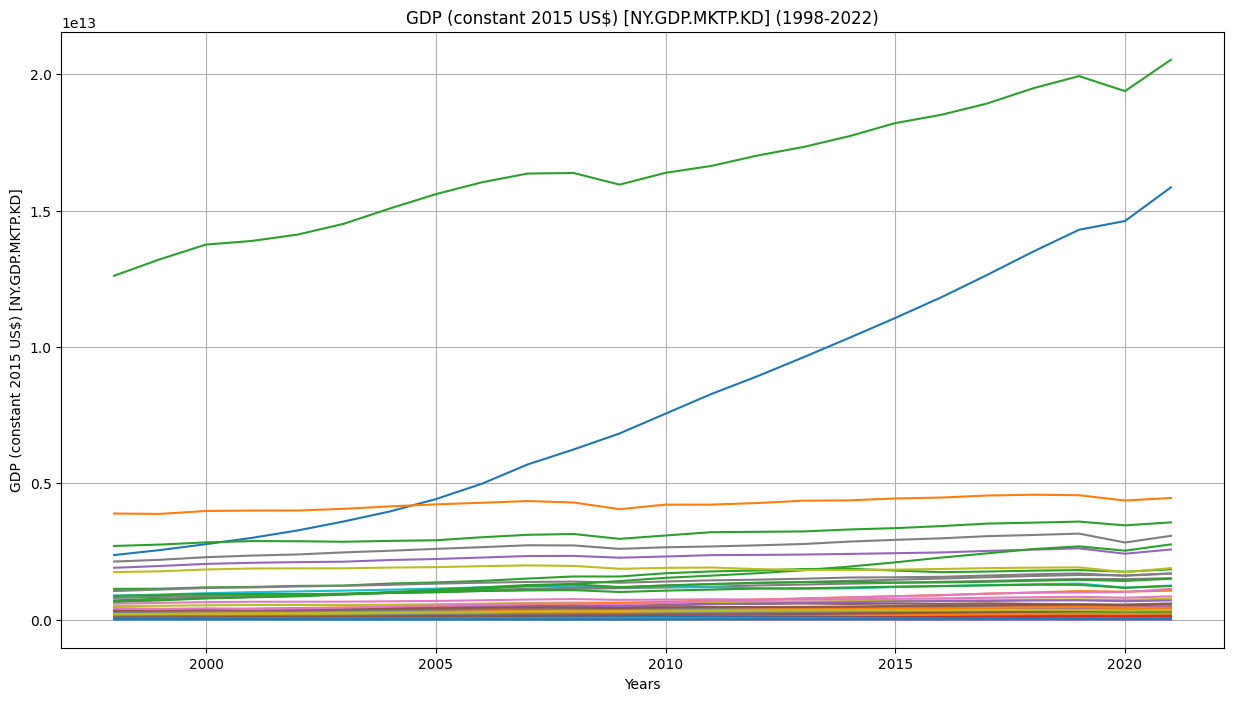

In [41]:
plot_all_countries(Glob_df3, "GDP (constant 2015 US$) [NY.GDP.MKTP.KD]")

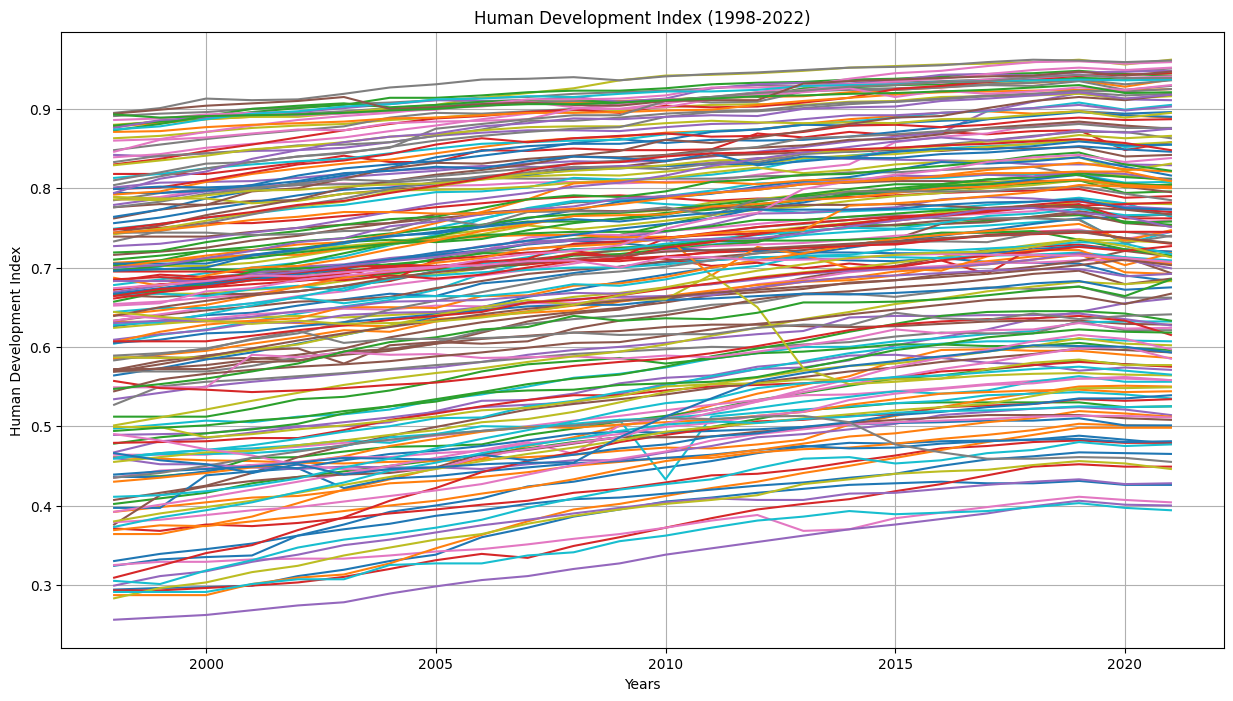

In [42]:
plot_all_countries(Glob_df3, "Human Development Index")

In [43]:
#I want create a column GDP pro capita, but taking inflation into account

Glob_df3["GDP_pc"] = Glob_df3["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"] / Glob_df3["Population, total [SP.POP.TOTL]"]

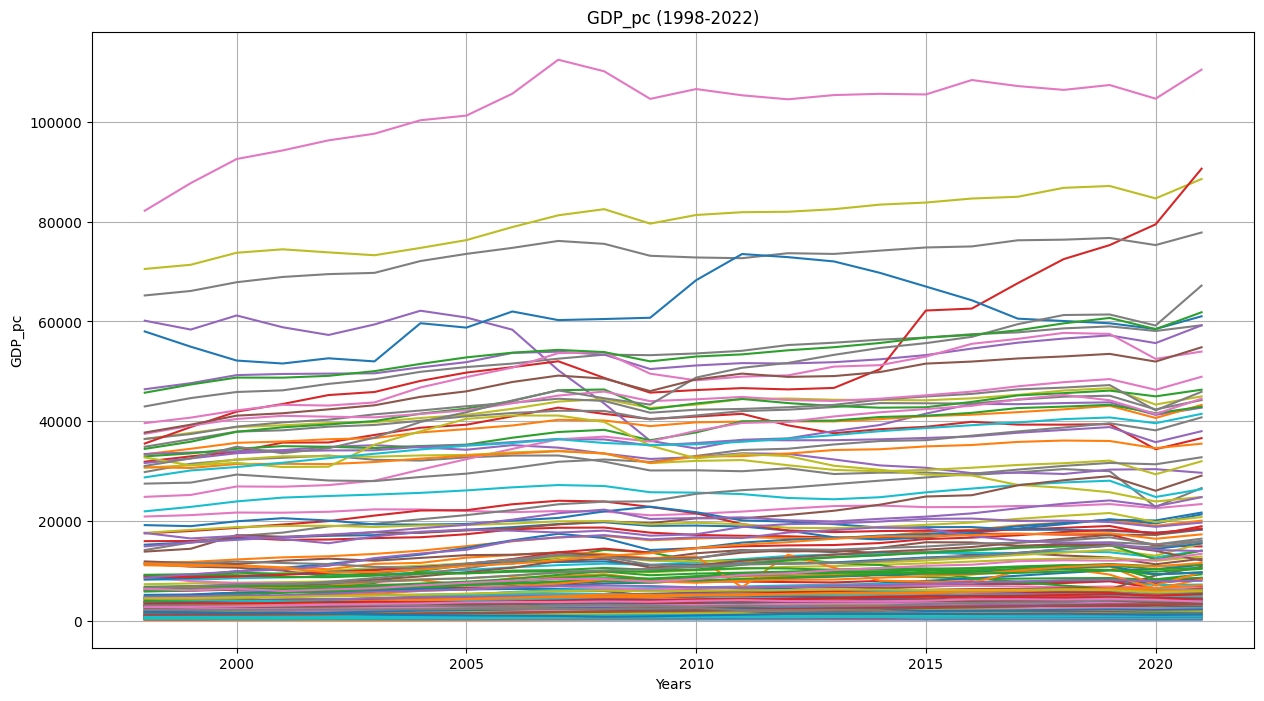

In [44]:
plot_all_countries(Glob_df3, "GDP_pc")

In [45]:
#watching the 10 highest gdp per capita in the world (year 2021)
Glob_df3.loc[Glob_df3.index.get_level_values("Year") == 2021, "GDP_pc"].nlargest(10)

Code  Year
LUX   2021    110425.888433
IRL   2021     90589.196731
CHE   2021     88520.322001
NOR   2021     77805.007548
SGP   2021     67175.863999
USA   2021     61829.845627
QAT   2021     61022.502896
AUS   2021     59225.524540
DNK   2021     59205.646688
SWE   2021     54816.005849
Name: GDP_pc, dtype: float64

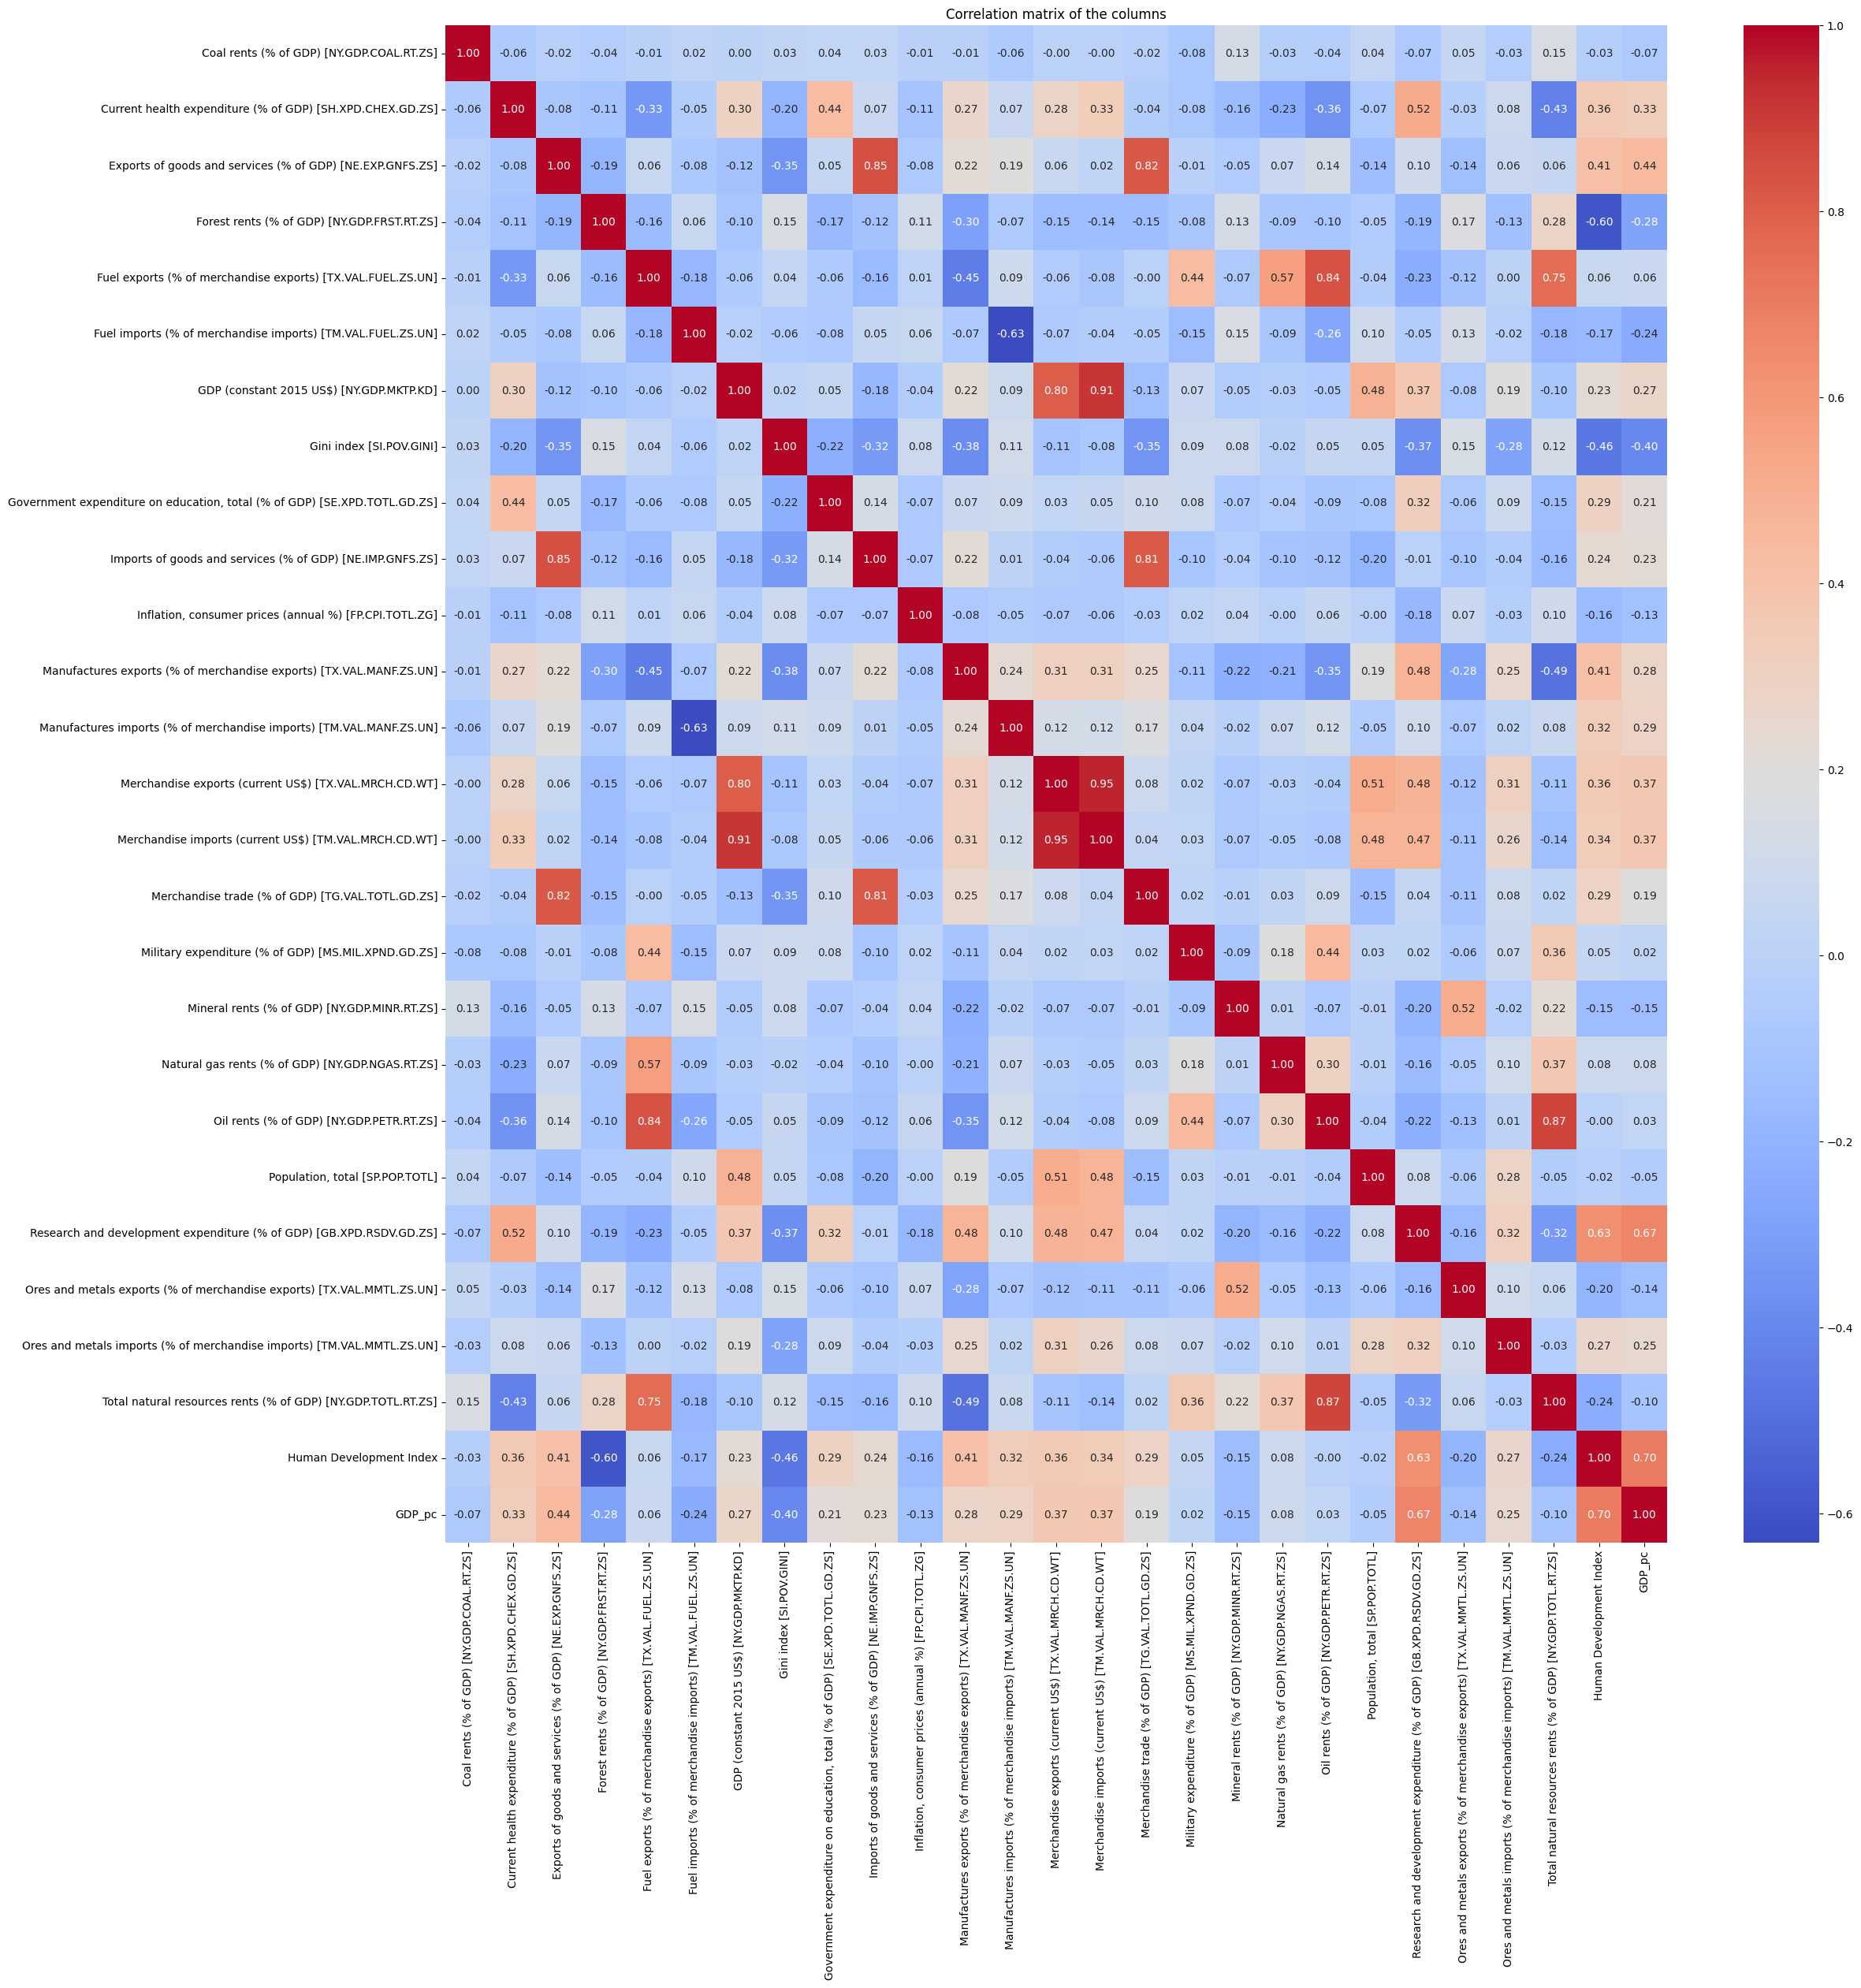

In [46]:
#I'm visualizing the correlation matrix of the coloumns
import seaborn as sns

correlation_matrix = Glob_df3.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix of the columns")
plt.show()

In [47]:
#The new dataset for interpolate the others columns useful for the analises
Glob_df4 = Glob_df3

In [48]:
Glob_df4.isna().groupby("Code").sum()

,Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (constant 2015 US$) [NY.GDP.MKTP.KD],Gini index [SI.POV.GINI],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],...,Mineral rents (% of GDP) [NY.GDP.MINR.RT.ZS],Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS],Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],"Population, total [SP.POP.TOTL]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS],Human Development Index,GDP_pc
Code,,,,,,,,,,,,,,,,,,,,,
AFG,4,4,22,4,20,12,0,24,12,22,...,4,4,4,0,24,16,15,4,0,0
AGO,0,3,4,0,10,10,0,21,7,4,...,0,0,0,0,23,10,10,0,0,0
ALB,0,5,0,0,0,0,0,13,1,0,...,0,0,0,0,22,0,0,0,0,0
AND,24,3,24,0,0,1,0,24,5,24,...,0,24,24,0,24,0,1,0,0,0
ARE,0,3,4,0,1,1,0,22,21,4,...,0,0,0,0,16,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0,3,4,0,4,4,0,21,11,4,...,0,0,0,0,24,4,4,0,0,0
YEM,3,8,3,3,8,7,0,21,11,3,...,3,3,3,0,24,7,7,3,0,0
ZAF,0,3,0,0,0,0,0,19,1,0,...,0,0,0,0,5,0,0,0,0,0


In [49]:
Glob_df4.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     124
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     554
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     424
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                    17
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   640
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   498
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                        0
Gini index [SI.POV.GINI]                                                     2552
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    1061
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     424
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        262
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           512
Manufactures imp

In [50]:
Glob_df4.groupby("Code").apply(lambda x: x.isnull().sum())

,Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (constant 2015 US$) [NY.GDP.MKTP.KD],Gini index [SI.POV.GINI],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],...,Mineral rents (% of GDP) [NY.GDP.MINR.RT.ZS],Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS],Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],"Population, total [SP.POP.TOTL]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS],Human Development Index,GDP_pc
Code,,,,,,,,,,,,,,,,,,,,,
AFG,4,4,22,4,20,12,0,24,12,22,...,4,4,4,0,24,16,15,4,0,0
AGO,0,3,4,0,10,10,0,21,7,4,...,0,0,0,0,23,10,10,0,0,0
ALB,0,5,0,0,0,0,0,13,1,0,...,0,0,0,0,22,0,0,0,0,0
AND,24,3,24,0,0,1,0,24,5,24,...,0,24,24,0,24,0,1,0,0,0
ARE,0,3,4,0,1,1,0,22,21,4,...,0,0,0,0,16,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0,3,4,0,4,4,0,21,11,4,...,0,0,0,0,24,4,4,0,0,0
YEM,3,8,3,3,8,7,0,21,11,3,...,3,3,3,0,24,7,7,3,0,0
ZAF,0,3,0,0,0,0,0,19,1,0,...,0,0,0,0,5,0,0,0,0,0


In [51]:
interpolate_country_nan(Glob_df4,"Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_14576\2421958859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [52]:
#I want select the first 13 country of GDP (constant 2015 US$), i'm selecting them usng the values at 2021.
sorted_21_gdp_df = Glob_df4.loc[Glob_df4.index.get_level_values("Year") == 2021].sort_values(by="GDP (constant 2015 US$) [NY.GDP.MKTP.KD]", ascending=False)
top_gdp9_countries = sorted_21_gdp_df.head(9) #i will use this for the line graph of the gdp performance
top_gdp_countries = sorted_21_gdp_df.head(13) #i will use it for the dataset useful for the other graphs
print(top_gdp_countries.index.get_level_values("Code"))
print(sorted_21_gdp_df)


Index(['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'BRA', 'KOR',
       'CAN', 'AUS', 'RUS'],
      dtype='object', name='Code')
           Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]  \
Code Year                                              
USA  2021                                   0.165542   
CHN  2021                                   0.607569   
JPN  2021                                   0.000357   
DEU  2021                                   0.014481   
GBR  2021                                   0.001023   
...                                              ...   
STP  2021                                   0.000000   
FSM  2021                                        NaN   
PLW  2021                                        NaN   
KIR  2021                                   0.000000   
TUV  2021                                        NaN   

           Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]  \
Code Year                                                 

In [53]:
#The new dataset with all the values and coloumns for each country
GDP_cons_df = Glob_df4.loc[Glob_df4.index.get_level_values("Code").isin(top_gdp_countries.index.get_level_values("Code"))]
GDP_cons_df


Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]  \
Code Year                                              
AUS  1998                                   0.175056   
     1999                                   0.107427   
     2000                                   0.184104   
     2001                                   0.634982   
     2002                                   0.402755   
...                                              ...   
USA  2017                                   0.182333   
     2018                                   0.198370   
     2019                                   0.131587   
     2020                                   0.083695   
     2021                                   0.165542   

           Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]  \
Code Year                                                              
AUS  1998                                                NaN           
     1999                                                NaN           
     2000                                           7.599617           
     2001                                           7.682723           
     2002                                           7.878076           
...                                                      ...           
USA  2017                                          16.767937           
     2018                                          16.640944           
     2019                                          16.676474           
     2020                                          18.815826           
     2021                                                NaN           

           Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]  \
Code Year                                                              
AUS  1998                                          19.557566           
     1999                                          18.294744           
     2000                                          19.390228           
     2001                                          22.152326           
     2002                                          20.726661           
...                                                      ...           
USA  2017                                          12.261738           
     2018                                          12.360989           
     2019                                          11.872470           
     2020                                          10.202126           
     2021                                          10.892727           

           Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]  \
Code Year                                                
AUS  1998                                     0.189067   
     1999                                     0.160988   
     2000                                     0.177575   
     2001                                     0.197341   
     2002                                     0.190275   
...                                                ...   
USA  2017                                     0.041420   
     2018                                     0.034627   
     2019                                     0.038216   
     2020                                     0.036796   
     2021                                     0.037713   

           Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]  \
Code Year                                                                
AUS  1998                                          17.919705             
     1999                                          18.253798             
     2000                                          20.894653             
     2001                                          20.763263             
     2002                                          20.688588             
...                                                      ...             
USA  2017                                          10.510451 

In [54]:
def plot_country_data(dataframe, countries, column_name, ylabel, title):
    plt.figure(figsize=(10, 6))

    for country_code in countries.index.get_level_values("Code").unique():
        country_data = dataframe.loc[country_code, column_name]
        years = country_data.index.get_level_values("Year")
        plt.plot(years, country_data, label=country_code)

    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title='Country Codes', loc='upper left')
    plt.grid()
    plt.show()

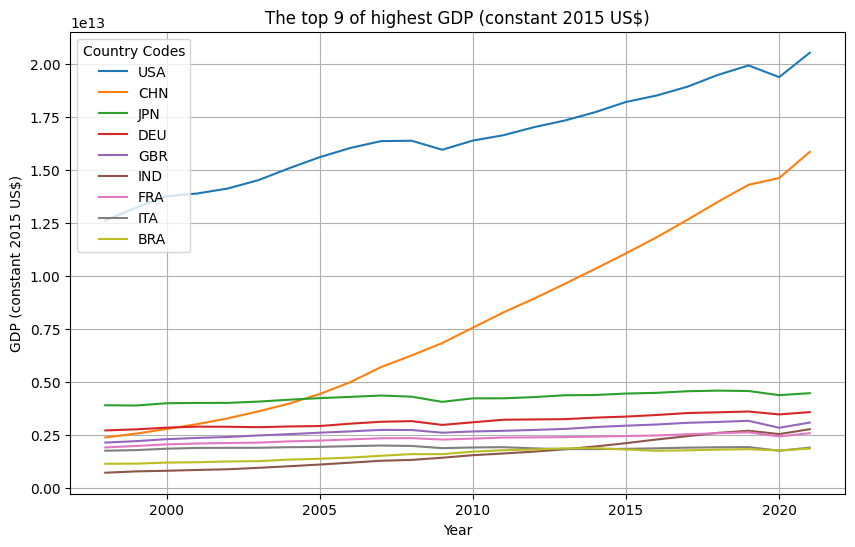

In [55]:
#Create line graph for GDP over time for the top 9 countries with highest GDP (constant 2015 US$) in 2021 among the biggest
#13 country considering the gdp in 2021
plot_country_data(GDP_cons_df, top_gdp9_countries, "GDP (constant 2015 US$) [NY.GDP.MKTP.KD]", 
                  "GDP (constant 2015 US$)", "The top 9 of highest GDP (constant 2015 US$)")

In [81]:
GDP_cons_df_21 = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021]
GDP_cons_df_21

,,Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (constant 2015 US$) [NY.GDP.MKTP.KD],Gini index [SI.POV.GINI],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],...,Mineral rents (% of GDP) [NY.GDP.MINR.RT.ZS],Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS],Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],"Population, total [SP.POP.TOTL]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS],Human Development Index,GDP_pc
Code,Year,,,,,,,,,,,,,,,,,,,,,
AUS,2021,0.786460,NaN,21.976819,0.123032,27.706072,10.267777,1.521232e+12,NaN,5.556048,17.725541,...,10.465775,1.718406,0.264201,25685412,1.82892,42.842322,1.788461,13.357875,0.951,59225.524540
BRA,2021,0.014315,NaN,19.561677,0.763405,13.657832,13.600847,1.847863e+12,52.9,NaN,18.619751,...,4.488940,0.069994,2.604457,214326223,1.14526,19.771212,3.913755,7.941112,0.754,8621.731582
CAN,2021,0.073021,11.678823,30.913988,0.068031,25.866069,6.186470,1.690932e+12,NaN,4.594006,30.955428,...,1.184260,0.793958,2.829785,38226498,1.69727,8.946462,4.124978,4.949056,0.936,44234.542136
CHN,2021,0.607569,NaN,19.943974,0.070843,1.239561,15.925086,1.585128e+13,NaN,3.297843,17.358017,...,0.510049,0.210525,0.308579,1412360000,2.43260,1.373866,15.275526,1.707565,0.768,11223.255348
DEU,2021,0.014481,12.805395,47.279520,0.030870,2.601563,8.720657,3.569114e+12,NaN,4.530964,41.881574,...,0.000000,0.017699,0.014035,83196078,3.14246,3.375514,5.270312,0.077085,0.942,42900.022519
FRA,2021,0.000000,NaN,30.034994,0.025297,3.192901,10.002801,2.575192e+12,NaN,5.245027,31.917320,...,0.000000,0.000138,0.007102,67764304,2.21918,2.594381,2.665344,0.032537,0.903,38002.194236
GBR,2021,0.001023,11.939087,29.597313,0.000000,8.329356,10.269732,3.075810e+12,NaN,5.327368,29.751335,...,0.000058,0.171322,0.416142,67026292,2.91476,6.911868,4.952173,0.588544,0.929,45889.611023
IND,2021,1.280292,NaN,21.514389,0.160726,14.284659,29.872840,2.761585e+12,34.2,4.635141,24.153295,...,1.315224,0.077494,0.325610,1407563842,0.64636,4.826800,5.461134,3.159345,0.633,1961.960889
ITA,2021,0.000000,9.454295,32.069233,0.009968,3.097830,13.381586,1.891178e+12,NaN,4.130886,29.836576,...,0.000000,0.025036,0.077005,59133173,1.45392,2.893718,5.966836,0.112009,0.895,31981.680708


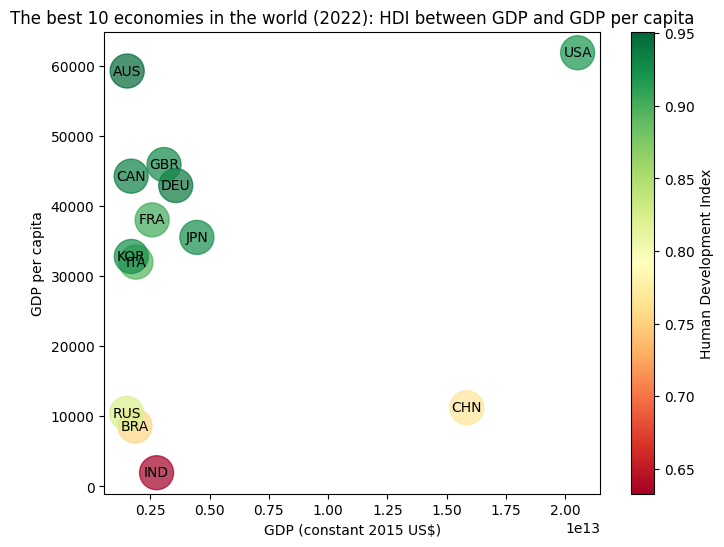

In [82]:

from matplotlib.cm import ScalarMappable

#Show the GDP per capita and Human Development Index for the best 10 economies in the world in the 2021
plt.figure(figsize=(8, 6))

scatter = plt.scatter(GDP_cons_df_21["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"], GDP_cons_df_21["GDP_pc"],
                      s=600, c=GDP_cons_df_21["Human Development Index"],
                      cmap="RdYlGn", alpha=0.7, label="GDP")

#labels with country names for each point
for i, code in enumerate(GDP_cons_df_21.index.get_level_values("Code")):
    plt.annotate(code,(GDP_cons_df_21["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"].iloc[i], GDP_cons_df_21["GDP_pc"].iloc[i]),
                 fontsize=10, ha="center",va="center",xytext=(0, 0), textcoords="offset points") 

plt.xlabel("GDP (constant 2015 US$)")
plt.ylabel("GDP per capita")
plt.title("The best 10 economies in the world (2022): HDI between GDP and GDP per capita")

#Color Bar
sm = ScalarMappable(cmap="RdYlGn")
sm.set_array(GDP_cons_df_21["Human Development Index"])

#Position of the bar
cbar = plt.colorbar(sm, label="Human Development Index", orientation="vertical", ax=plt.gca())
cbar.set_label("Human Development Index")

plt.show()

In [58]:
GDP_cons_df.index

MultiIndex([('AUS', 1998),
            ('AUS', 1999),
            ('AUS', 2000),
            ('AUS', 2001),
            ('AUS', 2002),
            ('AUS', 2003),
            ('AUS', 2004),
            ('AUS', 2005),
            ('AUS', 2006),
            ('AUS', 2007),
            ...
            ('USA', 2012),
            ('USA', 2013),
            ('USA', 2014),
            ('USA', 2015),
            ('USA', 2016),
            ('USA', 2017),
            ('USA', 2018),
            ('USA', 2019),
            ('USA', 2020),
            ('USA', 2021)],
           names=['Code', 'Year'], length=312)

In [59]:
GDP_cons_df.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     0
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                    35
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     0
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                   0
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   0
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   0
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                      0
Gini index [SI.POV.GINI]                                                     91
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    44
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     0
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        0
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           0
Manufactures imports (% of merchandise i

In [60]:
#I want select the first 9 country of Military expenditure (% of GDP) in 2021 among the biggest 13 countries in the world for gdp in 2021"
top_mil_countries= GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]", ascending=False).head(9)
print(top_mil_countries.index.get_level_values("Code"))

Index(['RUS', 'USA', 'KOR', 'IND', 'GBR', 'AUS', 'FRA', 'ITA', 'CHN'], dtype='object', name='Code')


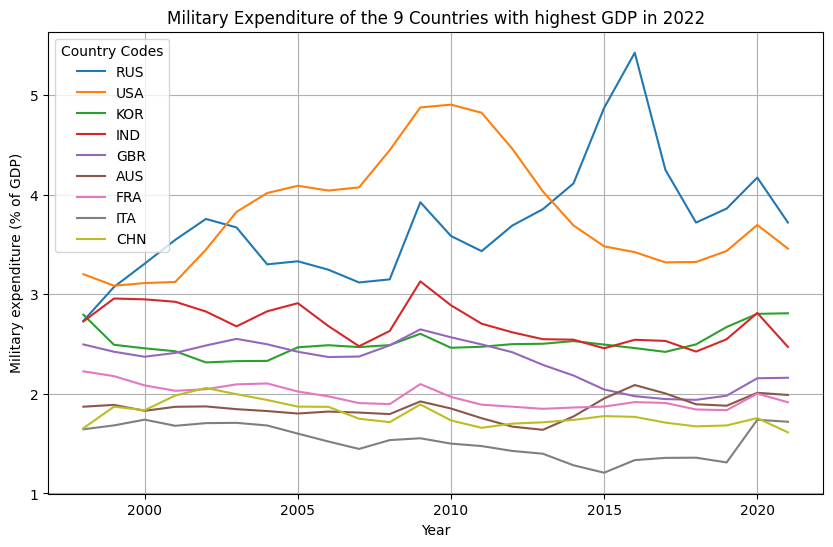

In [61]:
plot_country_data(GDP_cons_df, top_mil_countries, "Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]", 
                  "Military expenditure (% of GDP)", "Military Expenditure of the 9 Countries with highest GDP in 2022")

In [62]:
# Count of null values ​​of the column Research and development expenditure (% of GDP) for each country
null_rs_by_country = GDP_cons_df.groupby("Code")["Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]"].apply(lambda x: x.isna().sum())
print(null_rs_by_country)
GDP_cons_df.loc["AUS"]["Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]"]
#Nan for AUS present a distribution pretty spread out over the period, so I'll use interpolate on it too 

Code
AUS    12
BRA     3
CAN     0
CHN     0
DEU     0
FRA     0
GBR     0
IND     1
ITA     0
JPN     0
KOR     0
RUS     1
USA     0
Name: Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS], dtype: int64


Year
1998    1.51356
1999        NaN
2000    1.57320
2001        NaN
2002    1.74749
2003        NaN
2004    1.84902
2005        NaN
2006    2.18011
2007        NaN
2008    2.39995
2009        NaN
2010    2.37075
2011    2.23484
2012        NaN
2013    2.17843
2014        NaN
2015    1.92071
2016        NaN
2017    1.87977
2018        NaN
2019    1.82892
2020        NaN
2021        NaN
Name: Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS], dtype: float64

In [63]:
interpolate_country_nan(GDP_cons_df,"Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_14576\2421958859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [64]:
#I want select the first 9 country of "Research and development expenditure (% of GDP)" in 2021 among the biggest 13 countries in the world for gdp in 2021"
top_rs_countries = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]", ascending=False).head(9)
print(top_rs_countries.index.get_level_values("Code"))

Index(['KOR', 'USA', 'JPN', 'DEU', 'GBR', 'CHN', 'FRA', 'AUS', 'CAN'], dtype='object', name='Code')


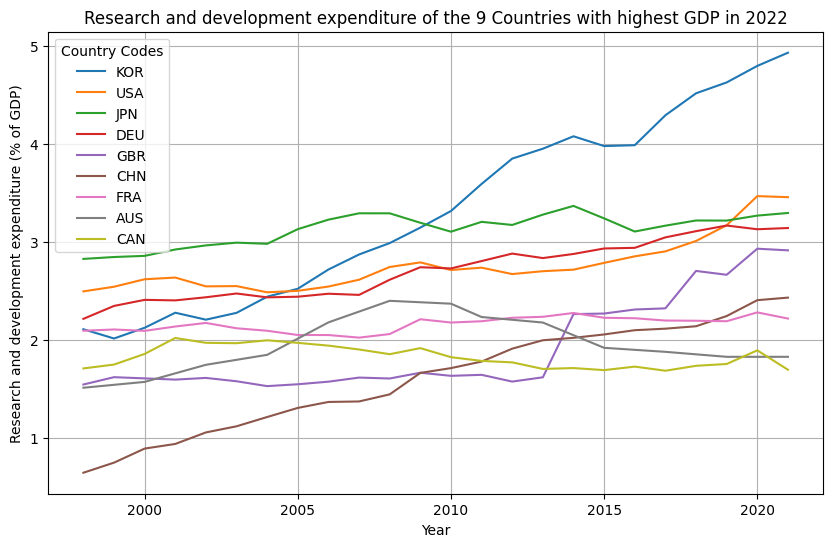

In [65]:
# Create line graph for military spending over time for the top 9 countries with highest military expenditure (% of GDP) in 2021 among the biggest
#country considering the gdp in 2021
plot_country_data(GDP_cons_df, top_rs_countries, "Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]", 
                  "Research and development expenditure (% of GDP)", "Research and development expenditure of the 9 Countries with highest GDP in 2022")

In [66]:
# Count of null values ​​of the column Research and development expenditure (% of GDP) for each country
GDP_cons_df.groupby("Code")["Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]"].apply(lambda x: x.isna().sum())

Code
AUS    0
BRA    0
CAN    0
CHN    0
DEU    0
FRA    0
GBR    0
IND    0
ITA    0
JPN    0
KOR    0
RUS    0
USA    0
Name: Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS], dtype: int64

In [67]:
#I want select the first 9 country of "Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]" in 2021 among the biggest 9 countries in the world for gdp in 2021"
top_nr_countries  = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]", ascending=False).head(9)
print(top_nr_countries.index.get_level_values("Code"))

Index(['RUS', 'AUS', 'BRA', 'CAN', 'IND', 'CHN', 'USA', 'GBR', 'ITA'], dtype='object', name='Code')


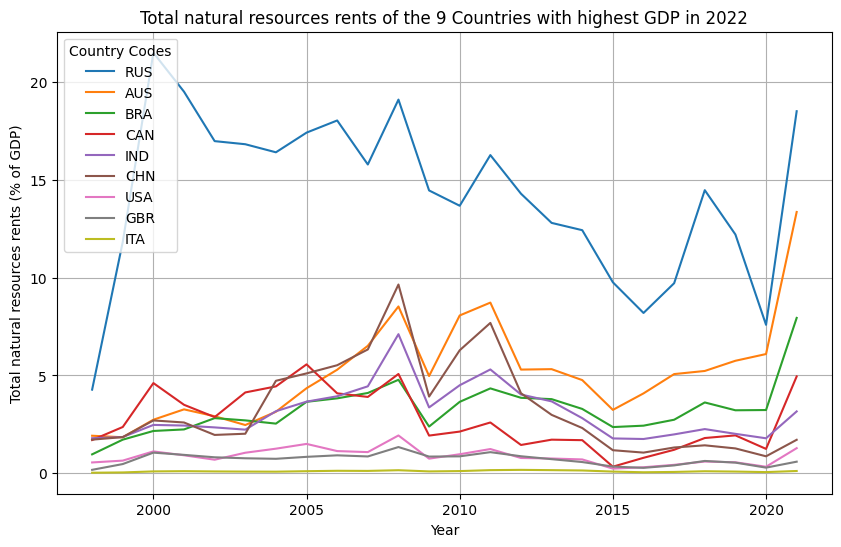

In [68]:
# Create line graph for military spending over time for the top 9 countries with highest military expenditure (% of GDP) in 2021 among the biggest
#country considering the gdp in 2021
plot_country_data(GDP_cons_df, top_nr_countries, "Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]", 
                  "Total natural resources rents (% of GDP)", "Total natural resources rents of the 9 Countries with highest GDP in 2022")

In [102]:
null_he_by_country = GDP_cons_df.groupby("Code")["Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]"].apply(lambda x: x.isna().sum())
print(null_he_by_country)
print(GDP_cons_df.loc["USA"]["Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]"])
GDP_cons_df.loc["IND"]["Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]"]


Code
AUS    3
BRA    3
CAN    2
CHN    3
DEU    2
FRA    3
GBR    2
IND    3
ITA    2
JPN    3
KOR    3
RUS    3
USA    3
Name: Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS], dtype: int64
Year
1998          NaN
1999          NaN
2000    12.487109
2001    13.164667
2002    13.991673
2003    14.501135
2004    14.546637
2005    14.574480
2006    14.703585
2007    14.914631
2008    15.204899
2009    16.198774
2010    16.195580
2011    16.137644
2012    16.116940
2013    15.986938
2014    16.192408
2015    16.481092
2016    16.793148
2017    16.767937
2018    16.640944
2019    16.676474
2020    18.815826
2021          NaN
Name: Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS], dtype: float64


Year
1998         NaN
1999         NaN
2000    4.034933
2001    4.262781
2002    4.240168
2003    4.008481
2004    3.957392
2005    3.791162
2006    3.634778
2007    3.517542
2008    3.514681
2009    3.485379
2010    3.272119
2011    3.246342
2012    3.329353
2013    3.749442
2014    3.619565
2015    3.595660
2016    3.504304
2017    2.935977
2018    2.858494
2019    2.943525
2020    2.959190
2021         NaN
Name: Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS], dtype: float64

In [103]:
interpolate_country_nan(GDP_cons_df,"Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_14576\2421958859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [104]:
top_he_countries = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]", ascending=False).head(9)
print(top_he_countries.index.get_level_values("Code"))

Index(['USA', 'DEU', 'FRA', 'GBR', 'CAN', 'JPN', 'AUS', 'BRA', 'ITA'], dtype='object', name='Code')


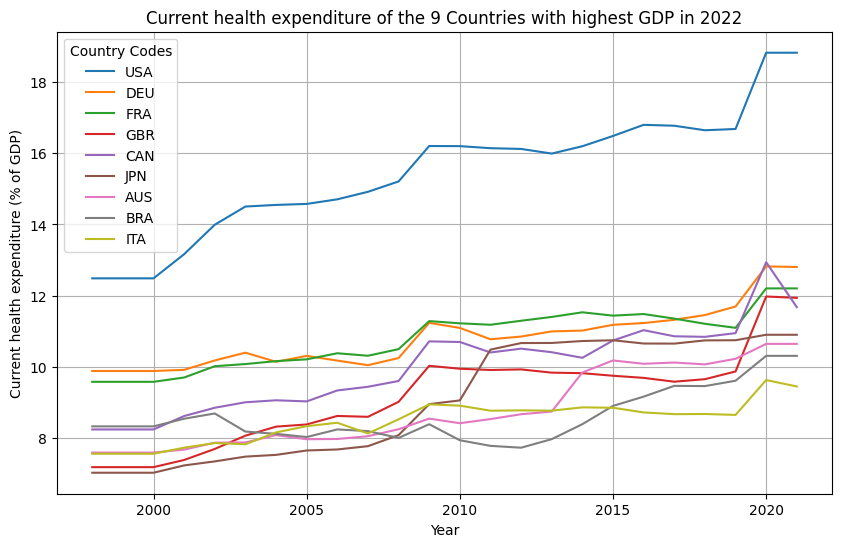

In [105]:
plot_country_data(GDP_cons_df, top_he_countries, "Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]", 
                  "Current health expenditure (% of GDP)", "Current health expenditure of the 9 Countries with highest GDP in 2022")

In [69]:
Glob_21_df = sorted_21_gdp_df
Glob_98_df = Glob_df4.loc[Glob_df4.index.get_level_values("Year") == 1998].sort_values(by="GDP (constant 2015 US$) [NY.GDP.MKTP.KD]", ascending=False)
print(Glob_21_df)
Glob_98_df


           Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]  \
Code Year                                              
USA  2021                                   0.165542   
CHN  2021                                   0.607569   
JPN  2021                                   0.000357   
DEU  2021                                   0.014481   
GBR  2021                                   0.001023   
...                                              ...   
STP  2021                                   0.000000   
FSM  2021                                        NaN   
PLW  2021                                        NaN   
KIR  2021                                   0.000000   
TUV  2021                                        NaN   

           Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]  \
Code Year                                                              
USA  2021                                                NaN           
CHN  2021                                              

,,Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (constant 2015 US$) [NY.GDP.MKTP.KD],Gini index [SI.POV.GINI],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],...,Mineral rents (% of GDP) [NY.GDP.MINR.RT.ZS],Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS],Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],"Population, total [SP.POP.TOTL]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS],Human Development Index,GDP_pc
Code,Year,,,,,,,,,,,,,,,,,,,,,
USA,1998,0.162197,NaN,10.515261,0.074901,1.568877,6.581475,1.261086e+13,40.0,NaN,12.310630,...,0.025027,0.211303,0.075559,275854000,2.49621,1.904051,2.380504,0.548987,0.893,45715.692645
JPN,1998,0.000062,NaN,10.373806,0.011195,0.318688,15.419648,3.892499e+12,NaN,3.29797,8.629380,...,0.000606,0.002413,0.000715,126400000,2.82745,1.225580,5.966150,0.014991,0.871,30795.088890
DEU,1998,0.017108,NaN,26.406906,0.030331,1.032911,5.579886,2.704200e+12,28.1,4.46187,25.178066,...,0.000095,0.002866,0.002498,82047195,2.21613,2.335836,3.519472,0.052897,0.879,32959.073569
CHN,1998,0.149940,NaN,18.342100,0.406925,2.815684,4.831367,2.371627e+12,NaN,1.84433,14.082205,...,0.438149,0.085785,0.634592,1241935000,0.64689,2.003623,5.016529,1.715391,0.564,1909.622328
GBR,1998,0.002581,NaN,24.429620,0.005844,4.141033,2.470705,2.131755e+12,36.6,4.20466,24.906835,...,0.000006,0.017839,0.145755,58487141,1.54649,2.062612,2.977709,0.172025,0.848,36448.264220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FSM,1998,NaN,NaN,18.753058,0.012990,NaN,NaN,2.925427e+08,NaN,NaN,82.502418,...,0.000000,0.000000,NaN,111406,NaN,NaN,NaN,0.012990,0.572,2625.915211
PLW,1998,NaN,NaN,NaN,NaN,NaN,NaN,2.247193e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,18852,NaN,NaN,NaN,0.000000,0.739,11920.183648
STP,1998,NaN,NaN,NaN,NaN,NaN,NaN,1.424850e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,139790,NaN,NaN,NaN,2.978518,0.494,1019.278739


In [70]:
def development_classes(row):
    if row['Human Development Index'] >= 0.8 and row['GDP_pc'] >= 11000:
        return "Developed"
    elif row['GDP (constant 2015 US$) [NY.GDP.MKTP.KD]'] >= 1.5e+12 or ((row['Human Development Index'] >= 0.8 and row['GDP_pc'] < 11000) or \
        (0.5 <= row['Human Development Index'] < 0.8 and row['GDP_pc'] >= 11000)  or \
            (0.5 <= row['Human Development Index'] < 0.8 and 3255 <= row['GDP_pc'] <= 11000)  or \
                (row['Human Development Index'] <= 0.5 and row['GDP_pc'] > 11000) or\
                    (row['Human Development Index'] > 0.8 and row['GDP_pc'] < 3255)):
        return "Developing"
    else:
        return "Underdeveloped"

Glob_21_df["Development_Class"] = Glob_21_df.apply(development_classes, axis=1)
Glob_98_df["Development_Class"] = Glob_98_df.apply(development_classes, axis=1)



In [71]:
Glob_21_df["Development_Class"].head(25)

Code  Year
USA   2021     Developed
CHN   2021    Developing
JPN   2021     Developed
DEU   2021     Developed
GBR   2021     Developed
IND   2021    Developing
FRA   2021     Developed
ITA   2021     Developed
BRA   2021    Developing
KOR   2021     Developed
CAN   2021     Developed
AUS   2021     Developed
RUS   2021    Developing
ESP   2021     Developed
MEX   2021    Developing
TUR   2021     Developed
IDN   2021    Developing
NLD   2021     Developed
CHE   2021     Developed
SAU   2021     Developed
POL   2021     Developed
SWE   2021     Developed
ARG   2021     Developed
BEL   2021     Developed
IRN   2021    Developing
Name: Development_Class, dtype: object

In [72]:
print(Glob_21_df.isna().sum())
Glob_98_df.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                      9
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                    150
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     25
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                    4
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   29
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   26
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                       0
Gini index [SI.POV.GINI]                                                     149
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]     39
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     25
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        17
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           25
Manufactures imports (% of m

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                      7
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                    171
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     20
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                    4
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   52
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   43
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                       0
Gini index [SI.POV.GINI]                                                     132
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]     89
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     20
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        23
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           44
Manufactures imports (% of m

In [73]:
counts_2021 = Glob_21_df["Development_Class"].value_counts()
counts_1998 = Glob_98_df["Development_Class"].value_counts()

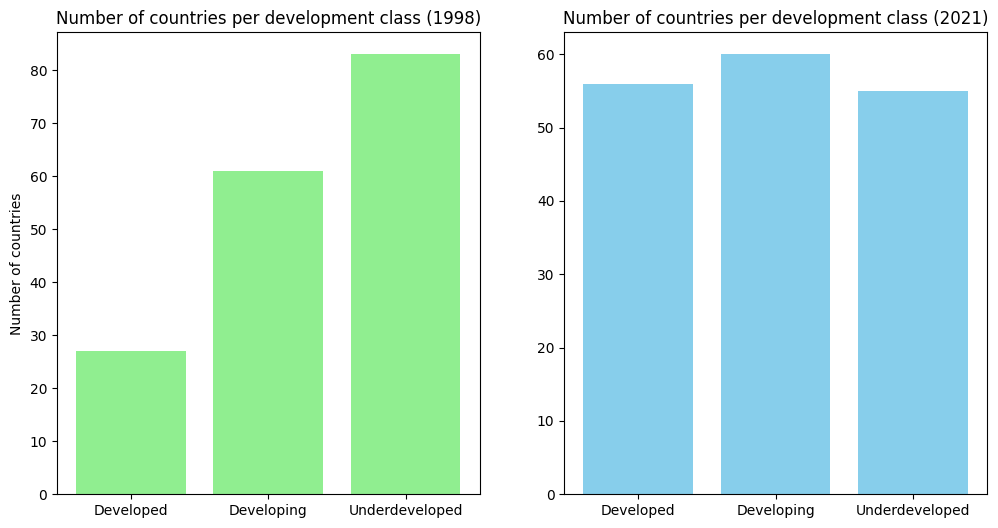

In [74]:
#Remeber: deleted 42 countries during the cleaning for lack of too many data in the coloumns HDI and GDP. 
#Probably a lot of them could be in the Underdeveloped and Developing classes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(counts_1998.reindex(["Developed", "Developing", "Underdeveloped"]).index, counts_1998.reindex(["Developed", "Developing", "Underdeveloped"]).values, color="lightgreen")
axs[0].set_title("Number of countries per development class (1998)")
axs[0].set_ylabel("Number of countries")

axs[1].bar(counts_2021.reindex(["Developed", "Developing", "Underdeveloped"]).index, counts_2021.reindex(["Developed", "Developing", "Underdeveloped"]).values, color="skyblue")
axs[1].set_title("Number of countries per development class (2021)")

plt.show()


In [75]:
print(Glob_21_df.groupby("Development_Class")["Population, total [SP.POP.TOTL]"].sum())
Glob_98_df.groupby("Development_Class")["Population, total [SP.POP.TOTL]"].sum()

Development_Class
Developed         1364608769
Developing        4591342874
Underdeveloped    1578135042
Name: Population, total [SP.POP.TOTL], dtype: int64


Development_Class
Developed          884951495
Developing        2249849761
Underdeveloped    2619712696
Name: Population, total [SP.POP.TOTL], dtype: int64

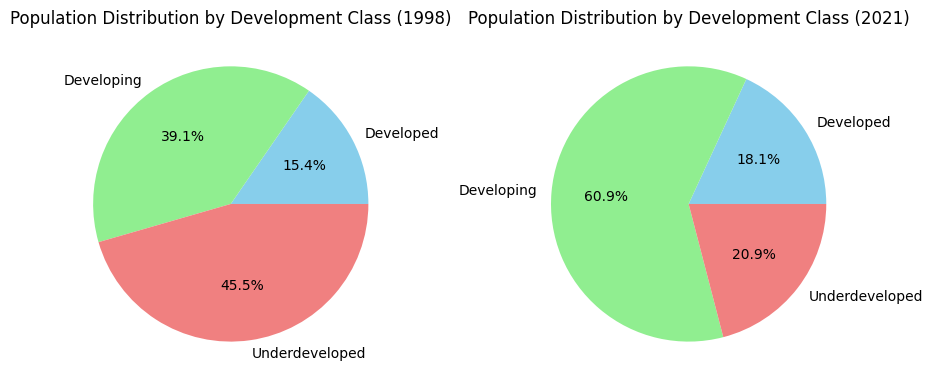

In [76]:
population_sum_1998 = {"Developed": 884951495,"Developing": 2249849761,"Underdeveloped": 2619712696}
population_sum_2021 = {"Developed": 1364608769, "Developing": 4591342874,"Underdeveloped": 1578135042}

fig, axs = plt.subplots(1, 2, figsize=(9, 7))

axs[0].pie(population_sum_1998.values(), labels=population_sum_1998.keys(), autopct='%1.1f%%', colors=["skyblue", "lightgreen", "lightcoral"])
axs[0].set_title('Population Distribution by Development Class (1998)')

axs[1].pie(population_sum_2021.values(), labels=population_sum_2021.keys(), autopct='%1.1f%%', colors=["skyblue", "lightgreen", "lightcoral"])
axs[1].set_title('Population Distribution by Development Class (2021)')

plt.tight_layout()
plt.show()

In [94]:
#show that 
#1)Developed countries have less % of GDP from natural resources rents
#2)during the period, exporter countries of natural resources increase their condition
print(f"1998:\n{Glob_98_df.groupby("Development_Class")["Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]"].mean()}\n2021:\n{Glob_21_df.groupby("Development_Class")["Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]"].mean()}")



1998:
Development_Class
Developed         1.016800
Developing        4.350060
Underdeveloped    7.954888
Name: Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS], dtype: float64
2021:
Development_Class
Developed         4.896486
Developing        7.405499
Underdeveloped    9.680971
Name: Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS], dtype: float64
